In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
#plt.rc('font', family='AppleGothic') 
#plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')
%matplotlib inline

In [2]:
# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [3]:
# 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증을 한다.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# PyDrive client 인증
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 4.8MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
%pwd

'/content'

In [6]:
%cd /content/drive/My Drive/수퍼판다

/content/drive/My Drive/수퍼판다


In [0]:
df = pd.read_excel('./전처리(미세먼지)/노원구전처리/공릉1동.xlsx')

In [0]:
df = df.drop('Unnamed: 0', axis=1)

In [32]:
df.head(2)

,temp,mise_med,c_mise_med,mise_mode,c_mise_mode,행정동명,날짜,PM10,PM2.5,연월,연도,월,일,시간,요일,일자
0,2018-04-01 00:00:00,45.5,23.5,30.0,10.0,공릉1동,NaN,NaN,NaN,2018-04-01,2018.0,4.0,1.0,0.0,6.0,2018-04-01
1,2018-04-01 01:00:00,52.5,27.0,50.0,10.0,공릉1동,2018-04-01 01,58.0,29.0,2018-04-01,2018.0,4.0,1.0,1.0,6.0,2018-04-01


In [0]:
df['temp'] = pd.to_datetime(df['temp'])

In [30]:
df.tail()

,temp,mise_med,c_mise_med,mise_mode,c_mise_mode,행정동명,날짜,PM10,PM2.5,연월,연도,월,일,시간,요일,일자
9089,NaT,80.0,62.0,80.0,62.0,NaN,2019-02-24 24,80.0,62.0,NaT,NaN,NaN,NaN,NaN,NaN,NaT
9090,NaT,54.0,23.0,54.0,23.0,NaN,2019-02-25 24,54.0,23.0,NaT,NaN,NaN,NaN,NaN,NaN,NaT
9091,NaT,50.0,29.0,50.0,29.0,NaN,2019-02-26 24,50.0,29.0,NaT,NaN,NaN,NaN,NaN,NaN,NaT
9092,NaT,62.0,40.0,62.0,40.0,NaN,2019-02-27 24,62.0,40.0,NaT,NaN,NaN,NaN,NaN,NaN,NaT
9093,NaT,99.0,73.0,99.0,73.0,NaN,2019-02-28 24,99.0,73.0,NaT,NaN,NaN,NaN,NaN,NaN,NaT


In [33]:
df["연도"] = df["temp"].dt.year #dt 라는 연산자를 이용해서 원하는 년, 월, 일, 시간을 불러올 수 있다. 
df["월"] = df["temp"].dt.month
df["일"] = df["temp"].dt.day
df["시간"] = df["temp"].dt.hour
df["요일"] = df["temp"].dt.dayofweek
df["일자"] = df["temp"].dt.date

df.sample()

,temp,mise_med,c_mise_med,mise_mode,c_mise_mode,행정동명,날짜,PM10,PM2.5,연월,연도,월,일,시간,요일,일자
4239,2018-09-24 15:00:00,13.0,4.0,13.0,4.0,공릉1동,2018-09-24 15,13.0,4.0,2018-09-01,2018.0,9.0,24.0,15.0,0.0,2018-09-24


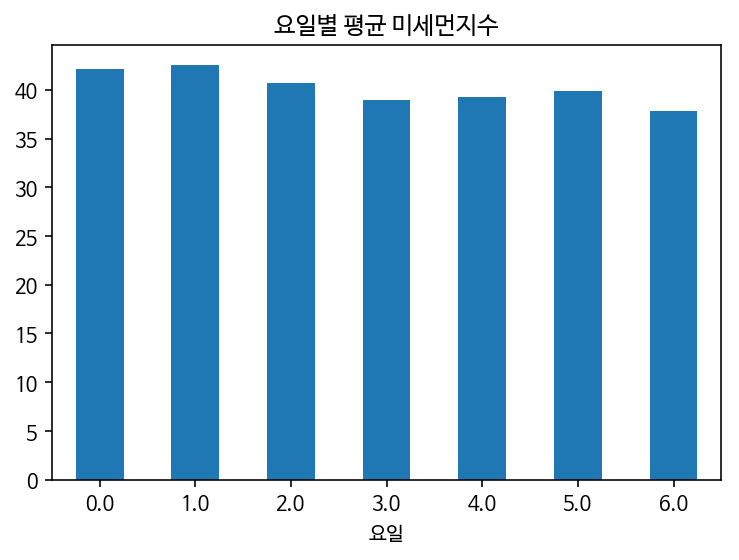

In [36]:
df.groupby('요일')['mise_med'].mean().plot.bar(
    title="요일별 평균 미세먼지수", rot=0)